In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import imdb


In [120]:
(X_train,y_train),(X_test,y_test)  = imdb.load_data(num_words=10000)

In [121]:
a = [max(s) for s in X_train]
max(a)

9999

In [122]:
len(X_train[1])

189

In [123]:
len(X_train)

25000

In [124]:
def onehotEncoding(sequence,dim = 10000):
    res = np.zeros((len(sequence),dim))

    for i,seq in enumerate(sequence):
#         print(i,seq)
          res[i,seq] = 1;
    return res

onehotEncoding(X_train)

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [125]:
X_train = onehotEncoding(X_train)
X_test = onehotEncoding(X_test)

In [126]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [127]:
X_partial = X_train[10000:]
y_partial = y_train[10000:]
X_val = X_train[:10000]
y_val = y_train[:10000]

In [128]:
print(f'X_train.shape:{X_train.shape} y_train:{y_train.shape}')


X_train.shape:(25000, 10000) y_train:(25000,)


In [129]:
model = models.Sequential([
    layers.Dense(16,activation='relu',input_shape=(10000,)),
#     layers.Dropout(.5),
    layers.Dense(16,activation='relu'),
#     layers.Dropout(.5),
    layers.Dense(1,activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [130]:
history = model.fit(X_partial,y_partial,epochs=10,batch_size = 512,validation_data=(X_val,y_val))

Epoch 1/10
 1/30 [>.............................] - ETA: 9s - loss: 0.6955 - accuracy: 0.4746

2022-05-11 10:41:01.708593: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 36ms/step - loss: 0.5100 - accuracy: 0.7836 - val_loss: 0.3726 - val_accuracy: 0.8719
Epoch 2/10
 1/30 [>.............................] - ETA: 0s - loss: 0.3369 - accuracy: 0.9082

2022-05-11 10:41:02.719561: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 0s 16ms/step - loss: 0.2950 - accuracy: 0.9052 - val_loss: 0.3392 - val_accuracy: 0.8611
Epoch 3/10
30/30 [==============================] - 0s 16ms/step - loss: 0.2205 - accuracy: 0.9285 - val_loss: 0.2805 - val_accuracy: 0.8873
Epoch 4/10
30/30 [==============================] - 0s 17ms/step - loss: 0.1738 - accuracy: 0.9427 - val_loss: 0.2765 - val_accuracy: 0.8879
Epoch 5/10
30/30 [==============================] - 0s 16ms/step - loss: 0.1405 - accuracy: 0.9556 - val_loss: 0.3230 - val_accuracy: 0.8736
Epoch 6/10
30/30 [==============================] - 0s 16ms/step - loss: 0.1168 - accuracy: 0.9641 - val_loss: 0.3173 - val_accuracy: 0.8790
Epoch 7/10
30/30 [==============================] - 0s 16ms/step - loss: 0.0989 - accuracy: 0.9708 - val_loss: 0.3220 - val_accuracy: 0.8790
Epoch 8/10
30/30 [==============================] - 0s 15ms/step - loss: 0.0798 - accuracy: 0.9780 - val_loss: 0.3307 - val_accuracy: 0.8804
Epoch 9/10
30/30 [======

In [131]:
model.evaluate(X_test,y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.4157 - accuracy: 0.8638


[0.41572409868240356, 0.8637600541114807]

In [137]:
hist = history.history

h = pd.DataFrame(history.history)
epochs = np.arange(1,len(h)+1)
h



,loss,accuracy,val_loss,val_accuracy
0,0.510003,0.783600,0.372552,0.8719
1,0.294991,0.905200,0.339209,0.8611
2,0.220488,0.928533,0.280530,0.8873
3,0.173845,0.942733,0.276490,0.8879
4,0.140537,0.955600,0.322967,0.8736
5,0.116829,0.964067,0.317279,0.8790
6,0.098876,0.970800,0.322010,0.8790
7,0.079786,0.978000,0.330669,0.8804
8,0.066266,0.983400,0.353209,0.8797
9,0.058016,0.985333,0.387515,0.8768


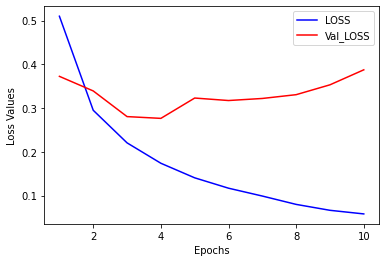

In [138]:
plt.plot(epochs,hist['loss'],'b-',label='LOSS')
plt.plot(epochs,hist['val_loss'],'r-',label='Val_LOSS')
plt.xlabel("Epochs")
plt.ylabel("Loss Values")
plt.legend()
plt.show()

In [ ]:
plt.plot(epochs,hist['accuracy'],'b-',label='ACCURACY')
plt.plot(epochs,hist['val_accuracy'],'r-',label='Val_ACCURACY')
plt.xlabel("Accuracy")
plt.ylabel("Accuracy Values")
plt.legend()
plt.show()

In [ ]:
history = model.fit(X_partial,y_partial,epochs=3,batch_size = 512,validation_data=(X_val,y_val))